<a href="https://colab.research.google.com/github/alimurrofid/Machine-Learning-Kelas-3E/blob/main/21%20Muhammad%20'Ali%20Murrofid/Jobsheet%2011%20-%20Convolutional%20Neural%20Network%20(CNN)/tugasjs11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tugas
# 1. Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.


## Langkah 1 - Load Library

In [1]:
# Import library dan modul yang dibutuhkan
from tensorflow.keras.datasets import cifar10 #Mengimpor dataset CIFAR-10 yang disediakan oleh TensorFlow.
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image

## Langkah 2 - Unduh Dataset CIFAR

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


## Langkah 3 - Normalisasi data dan konversi label ke vektor one-hot encoded

In [3]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Langkah 4 - Memisahkan data latih menjadi data latih dan data validasi

In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Langkah 5 - Mendefinisikan model Convolutional Neural Network (CNN)

In [5]:
def cnn_model():
    model = Sequential()
    # First Conv layer
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Second Conv layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Third, fourth, fifth convolution layer
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Fully Connected layers
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.summary()

    return model

## Langkah 6 - Membuat objek ImageDataGenerator dan mempersiapkan augmentasi data

In [6]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(X_train)

## Langkah 7 - Mengonfigurasi dan mengompilasi model jaringan saraf konvolusi (CNN) dalam TensorFlow atau Keras.

In [7]:
model = cnn_model()
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0003),
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 256)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 256)         0

## Langkah 8 - Melatih model dengan ImageDataGenerator

In [9]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    steps_per_epoch=len(X_train) // 64,
    epochs=25,
    validation_data=(X_valid, y_valid),
    verbose=1
)

Epoch 1/25
625/625 [==============================] - 30s 48ms/step - loss: 0.6614 - accuracy: 0.8275 - val_loss: 0.6911 - val_accuracy: 0.8159
Epoch 2/25
625/625 [==============================] - 31s 50ms/step - loss: 0.6568 - accuracy: 0.8278 - val_loss: 0.6346 - val_accuracy: 0.8335
Epoch 3/25
625/625 [==============================] - 31s 50ms/step - loss: 0.6535 - accuracy: 0.8305 - val_loss: 0.6775 - val_accuracy: 0.8207
Epoch 4/25
625/625 [==============================] - 32s 50ms/step - loss: 0.6446 - accuracy: 0.8320 - val_loss: 0.6576 - val_accuracy: 0.8266
Epoch 5/25
625/625 [==============================] - 30s 49ms/step - loss: 0.6425 - accuracy: 0.8352 - val_loss: 0.6299 - val_accuracy: 0.8407
Epoch 6/25
625/625 [==============================] - 31s 50ms/step - loss: 0.6423 - accuracy: 0.8378 - val_loss: 0.6006 - val_accuracy: 0.8443
Epoch 7/25
625/625 [==============================] - 31s 49ms/step - loss: 0.6285 - accuracy: 0.8401 - val_loss: 0.6224 - val_accuracy:

## Langkah 9 - Mengevaluasi model pada set tes

In [10]:
scores = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.6924 - accuracy: 0.8329


## Langkah 10 - Melakukan prediksi

<Axes: >

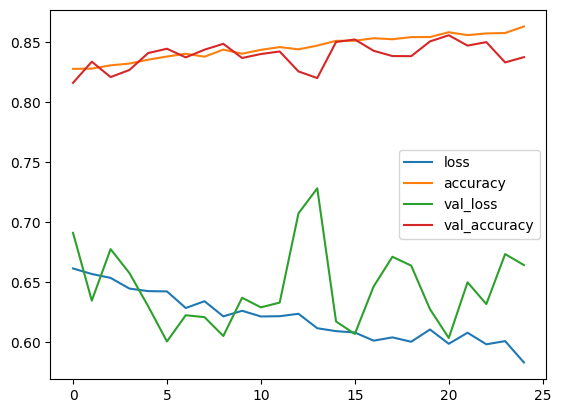

In [11]:
pd.DataFrame(history.history).plot()

## Langkah 11 - Tampilkan laporan klasifikasi

In [12]:
scores = model.evaluate(X_test, y_test)
pred = model.predict(X_test)
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
errors = y_pred - y_true != 0
print(classification_report(y_true, y_pred))

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1000
           1       0.93      0.92      0.92      1000
           2       0.87      0.68      0.76      1000
           3       0.78      0.64      0.71      1000
           4       0.77      0.82      0.80      1000
           5       0.84      0.71      0.77      1000
           6       0.72      0.96      0.82      1000
           7       0.84      0.91      0.87      1000
           8       0.89      0.92      0.91      1000
           9       0.84      0.94      0.89      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000



## Langkah 12 - Menampilkan visualisasi hasil prediksi

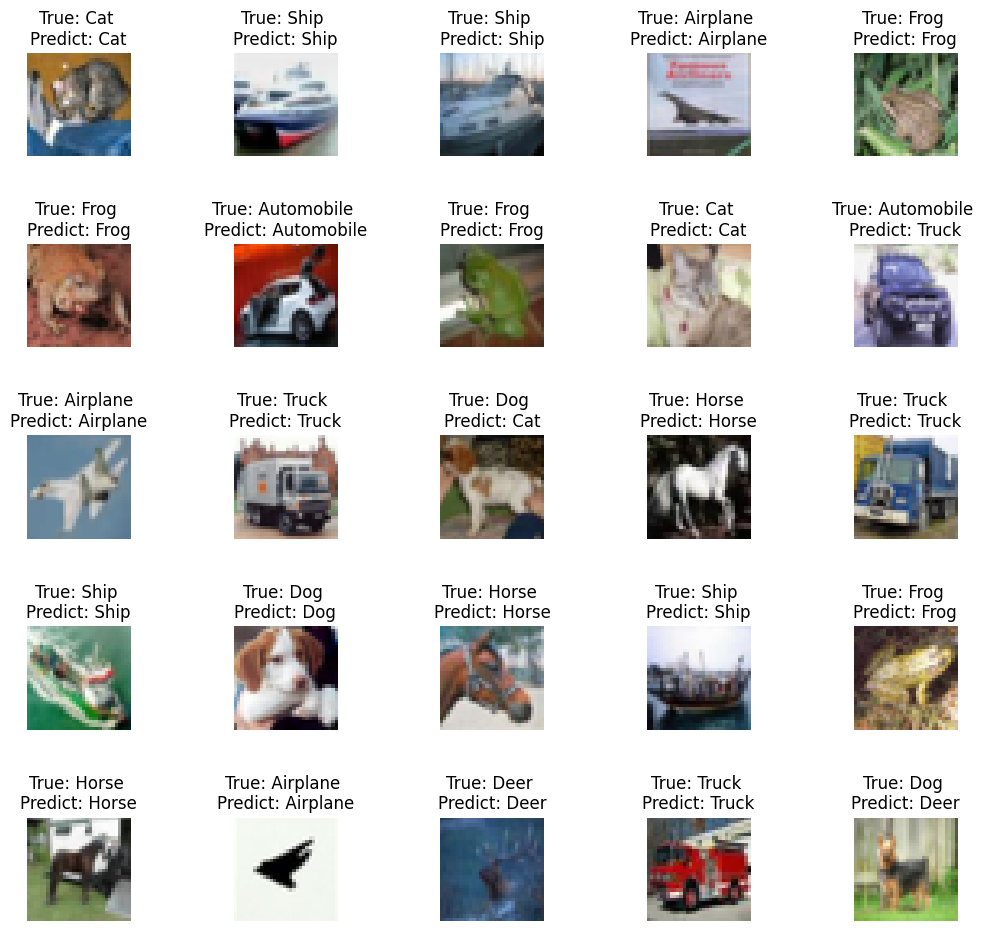

In [13]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()
for i in np.arange(25):
    axes[i].imshow(X_test[i])
    axes[i].set_title('True: %s \nPredict: %s' % (labels[y_true[i]], labels[y_pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

# Tugas
# 2. Buatlah model CNN untuk klasifikasi dataset MNIST.

## Langkah 1 - Load library

In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Langkah 2 - Memuat dataset MNIST

In [15]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## Langkah 3 - Membangun model CNN

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

## Langkah 4 - Compile Model

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

## Langkah 5 - Train Model

In [19]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2209 - accuracy: 0.9464 - val_loss: 0.0718 - val_accuracy: 0.9774
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0679 - accuracy: 0.9792 - val_loss: 0.0549 - val_accuracy: 0.9820
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0540 - accuracy: 0.9836 - val_loss: 0.0560 - val_accuracy: 0.9823
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0456 - accuracy: 0.9861 - val_loss: 0.0567 - val_accuracy: 0.9832
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0370 - accuracy: 0.9887 - val_loss: 0.0511 - val_accuracy: 0.9853
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0323 - accuracy: 0.9902 - val_loss: 0.0474 - val_accuracy: 0.9867
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0282 - accuracy: 0.9913 - val_loss: 0.0420 - val_accuracy

## Langkah 6 - Model Evaluation

313/313 - 1s - loss: 0.0519 - accuracy: 0.9872 - 810ms/epoch - 3ms/step


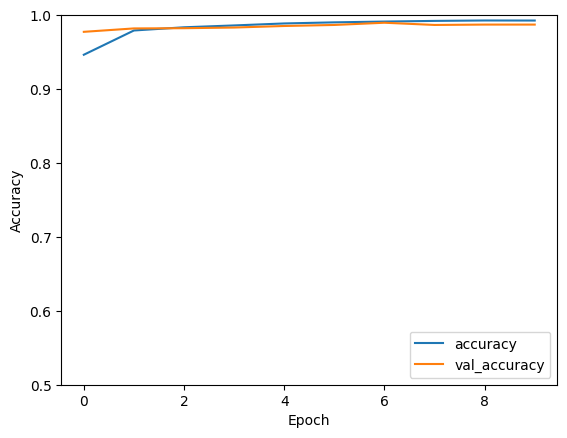

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [21]:
print(test_acc)

0.9872000217437744
